# Imports

In [2]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
import pandas
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import numpy as np

# 1.1 Data preparation

In [127]:
data = pandas.read_csv("glass_dataset.csv")
classes = ["1", "2", "3", "4", "5", "6", "7"]
inputs = data.values[:, :-1] # Features of the glass
targets = np.array([classes.index(str(int(cls))) for cls in data.values[:, -1]]) + 1 # Label of the type of glass (1-7)


In [128]:
print(inputs) 

[[ 1.52101 13.64     4.49    ...  8.75     0.       0.     ]
 [ 1.51761 13.89     3.6     ...  7.83     0.       0.     ]
 [ 1.51618 13.53     3.55    ...  7.78     0.       0.     ]
 ...
 [ 1.52065 14.36     0.      ...  8.44     1.64     0.     ]
 [ 1.51651 14.38     0.      ...  8.48     1.57     0.     ]
 [ 1.51711 14.23     0.      ...  8.62     1.67     0.     ]]


In [129]:
print(targets) 

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]


In [78]:
scaler = StandardScaler()
scaled_inputs = scaler.fit_transform(inputs)
compressed = PCA(n_components=4).fit_transform(scaled_inputs)

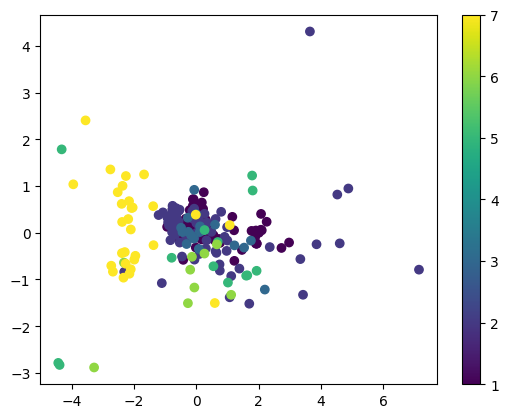

In [130]:
# Plot the resulting PCA embedding .
plt.figure()
plt.scatter(compressed[:,0],compressed [:,-1],c=targets,cmap ="viridis")
plt.colorbar()
plt.savefig ("glass_PCA.pdf", bbox_inches ="tight")

# 1.2 Classifcation 

## KNN

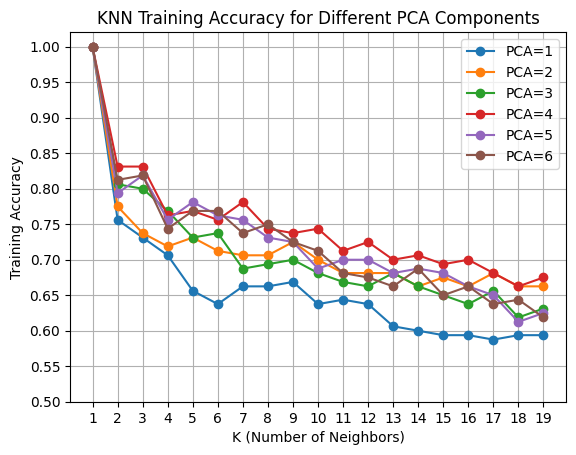

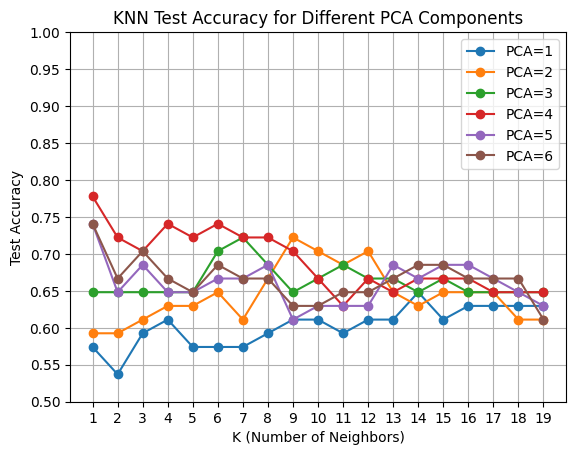

In [ ]:

k_range = range(1, 20)
pca_range = range(1, 7)

plt.figure()
for p in pca_range:
    train_scores = []
    compressed = PCA(n_components=p).fit_transform(scaled_inputs)
    x_train, x_test, t_train, t_test = train_test_split(compressed, targets, random_state=42)
    for k in k_range:
        k_classifier = KNeighborsClassifier(n_neighbors=k)
        k_classifier.fit(x_train, t_train)
        train_accuracy = k_classifier.score(x_train, t_train)
        train_scores.append(train_accuracy)
    plt.plot(k_range, train_scores, marker='o', linestyle='-', label=f'PCA={p}')

plt.xlabel("K (Number of Neighbors)")
plt.ylabel("Training Accuracy")
plt.title("KNN Training Accuracy for Different PCA Components")
plt.xticks(k_range)
plt.yticks(np.linspace(0.5, 1, 11))
plt.grid(True)
plt.legend()
plt.savefig("knn_training_accuracy.png", bbox_inches="tight")
plt.show()


plt.figure() 
for p in pca_range:
    test_scores =[]
    compressed = PCA(n_components=p).fit_transform(scaled_inputs)
    x_train, x_test, t_train, t_test = train_test_split(compressed, targets, random_state=42)
    for k in k_range:
        k_classifier = KNeighborsClassifier(n_neighbors=k)
        k_classifier.fit(x_train, t_train)
        test_accuracy = k_classifier.score(x_test, t_test)
        test_scores.append(test_accuracy)
    plt.plot(k_range, test_scores, marker='o', linestyle='-', label=f'PCA={p}')

plt.xlabel("K (Number of Neighbors)")
plt.ylabel("Test Accuracy")
plt.title("KNN Test Accuracy for Different PCA Components")
plt.xticks(k_range)
plt.yticks(np.linspace(0.5, 1, 11))
plt.grid(True)
plt.legend()
plt.savefig("knn_test_accuracy.png", bbox_inches="tight")
plt.show()


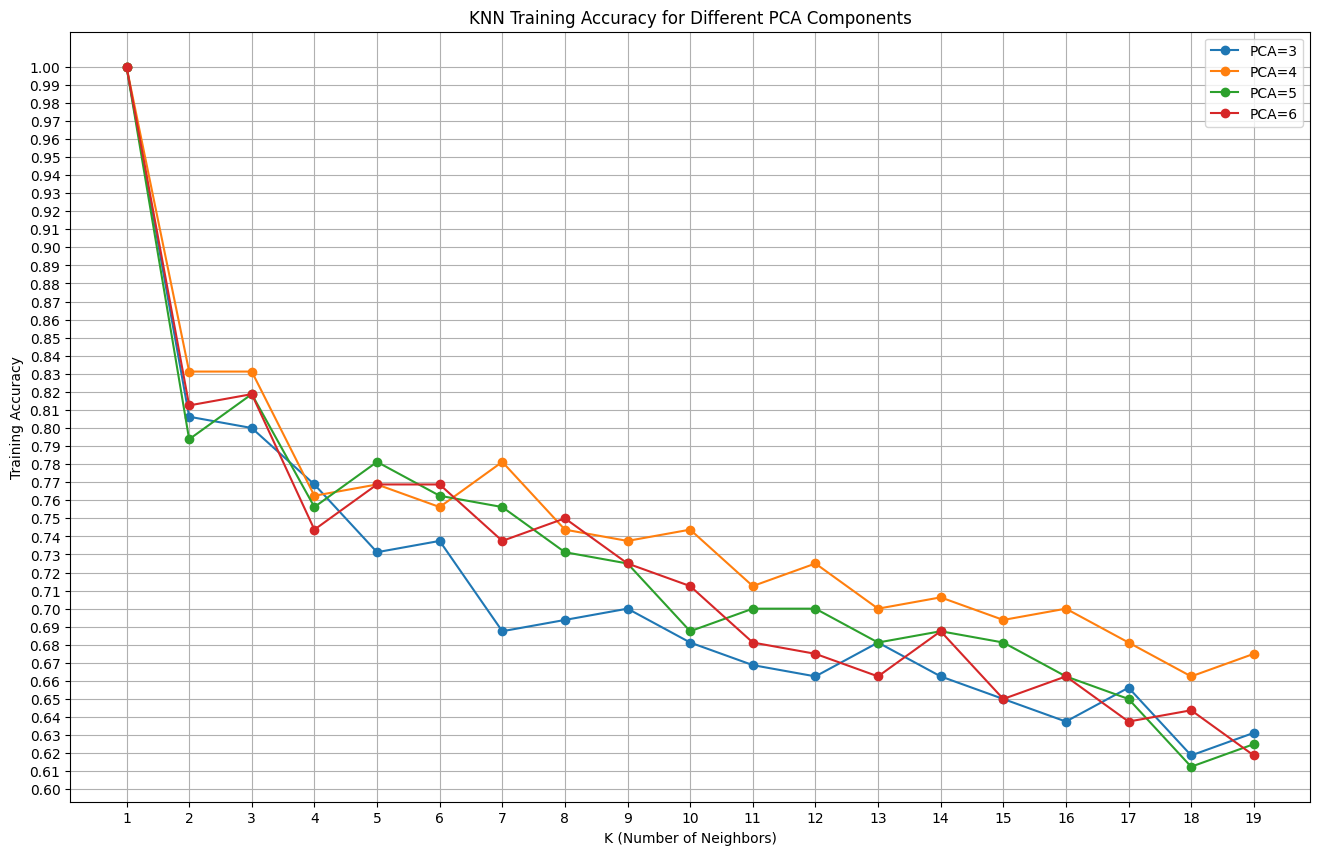

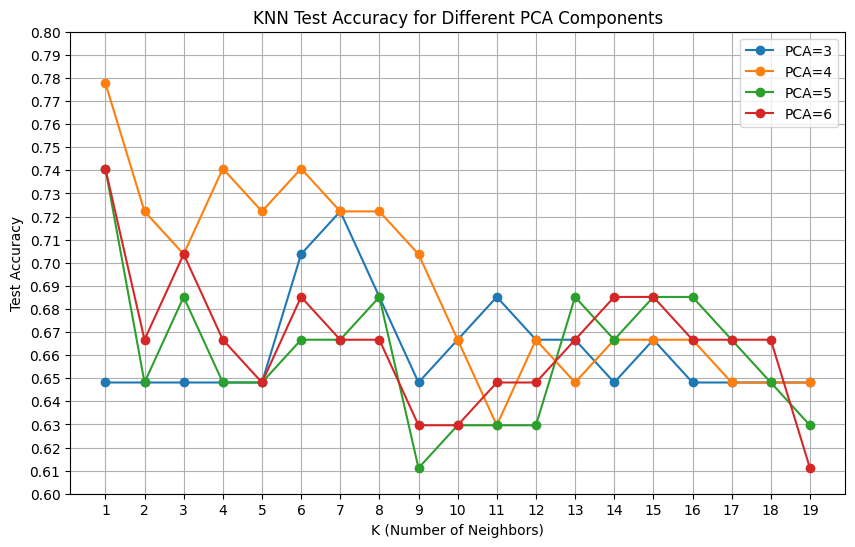

In [170]:
k_range = range(1, 20)
pca_range = range(3, 7)

plt.figure(figsize=(16, 10))
for p in pca_range:
    train_scores = []
    compressed = PCA(n_components=p).fit_transform(scaled_inputs)
    x_train, x_test, t_train, t_test = train_test_split(compressed, targets, random_state=42)
    for k in k_range:
        k_classifier = KNeighborsClassifier(n_neighbors=k)
        k_classifier.fit(x_train, t_train)
        train_accuracy = k_classifier.score(x_train, t_train)
        train_scores.append(train_accuracy)
    plt.plot(k_range, train_scores, marker='o', linestyle='-', label=f'PCA={p}')

plt.xlabel("K (Number of Neighbors)")
plt.ylabel("Training Accuracy")
plt.title("KNN Training Accuracy for Different PCA Components")
plt.xticks(k_range)
plt.yticks(np.linspace(0.6, 1, 41))
plt.grid(True)
plt.legend()
plt.savefig("knn_training_accuracy_PCA_3&4&5&6.png", bbox_inches="tight")
plt.show()


plt.figure(figsize=(10, 6)) 
for p in pca_range:
    test_scores =[]
    compressed = PCA(n_components=p).fit_transform(scaled_inputs)
    x_train, x_test, t_train, t_test = train_test_split(compressed, targets, random_state=42)
    for k in k_range:
        k_classifier = KNeighborsClassifier(n_neighbors=k)
        k_classifier.fit(x_train, t_train)
        test_accuracy = k_classifier.score(x_test, t_test)
        test_scores.append(test_accuracy)
    plt.plot(k_range, test_scores, marker='o', linestyle='-', label=f'PCA={p}')

plt.xlabel("K (Number of Neighbors)")
plt.ylabel("Test Accuracy")
plt.title("KNN Test Accuracy for Different PCA Components")
plt.xticks(k_range)
plt.yticks(np.linspace(0.6, 0.8, 21))
plt.grid(True)
plt.legend()
plt.savefig("knn_test_accuracy_PCA_3&4&5&6.png", bbox_inches="tight")

In [171]:
compressed = PCA(n_components=4).fit_transform(scaled_inputs)
x_train, x_test, t_train, t_test = train_test_split(compressed, targets, random_state=42)
k_classifier = KNeighborsClassifier(n_neighbors=6).fit(x_train, t_train)
classified_data = k_classifier.predict(x_test)  

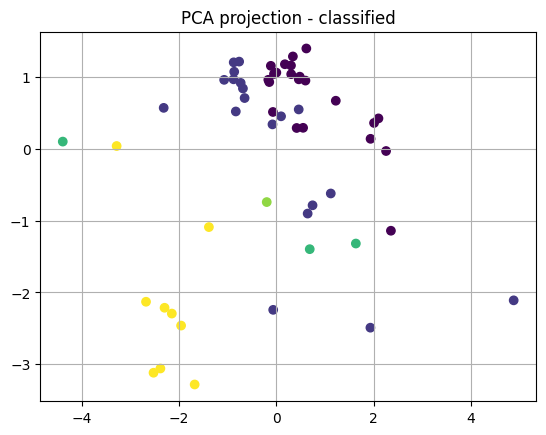

In [172]:
plt.figure()
plt.scatter(x_test[:,0], x_test[:,1], c=classified_data, cmap='viridis')
plt.title("PCA projection - classified")
plt.grid(True)
plt.savefig("glass_knn_pca_classified.png", bbox_inches ="tight")
plt.show()


## SVM 

### Kernel Investigation

#### PCA 1

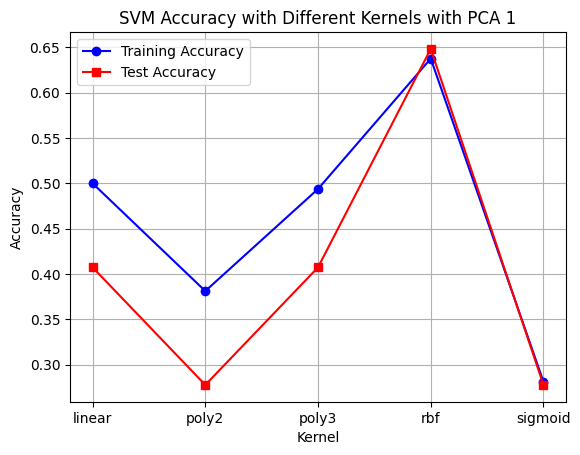

In [134]:
compressed = PCA(n_components=1).fit_transform(scaled_inputs)
x_train,x_test,t_train,t_test = train_test_split(compressed,targets, random_state= 42)
kernel_range = ["linear", "poly2", "poly3","rbf", "sigmoid"]
training_scores = []
test_scores = []
for k in kernel_range:
    if k == 'poly2':
        svm_classifier = SVC(kernel="poly", degree= 2, gamma='auto').fit(x_train,t_train)
    elif k == 'poly3':
        svm_classifier = SVC(kernel="poly", degree= 3, gamma='auto').fit(x_train,t_train) 
    else:
        svm_classifier = SVC(kernel=k, gamma='auto').fit(x_train,t_train) 
    y_train = svm_classifier.predict(x_train)
    y_test = svm_classifier.predict(x_test) 
    training_scores.append(accuracy_score(t_train,y_train))
    test_scores.append(accuracy_score(t_test,y_test))

plt.figure()
plt.title("SVM Accuracy with Different Kernels with PCA 1")
plt.xlabel("Kernel")
plt.ylabel("Accuracy")
plt.plot(kernel_range, training_scores, marker='o', label='Training Accuracy', color='blue')
plt.plot(kernel_range, test_scores, marker='s', label='Test Accuracy', color='red')
plt.xticks(kernel_range)  
plt.legend()
plt.grid(True)
plt.savefig("svm_kernel_pca_1.png", bbox_inches="tight")
plt.show()

#### PCA 2

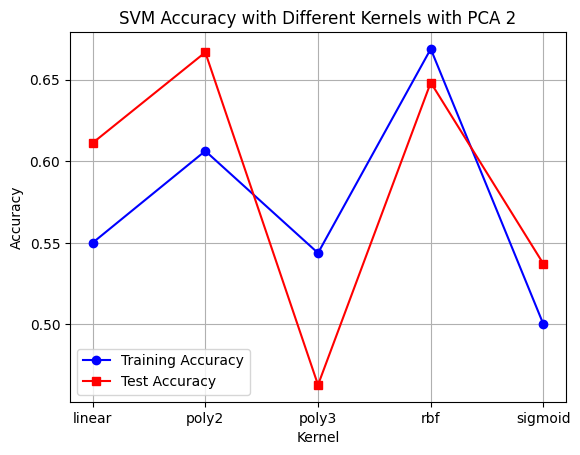

In [135]:
compressed = PCA(n_components=2).fit_transform(scaled_inputs)
x_train,x_test,t_train,t_test = train_test_split(compressed,targets, random_state= 42)
kernel_range = ["linear", "poly2", "poly3","rbf", "sigmoid"]
training_scores = []
test_scores = []
for k in kernel_range:
    if k == 'poly2':
        svm_classifier = SVC(kernel="poly", degree= 2, gamma='auto').fit(x_train,t_train)
    elif k == 'poly3':
        svm_classifier = SVC(kernel="poly", degree= 3, gamma='auto').fit(x_train,t_train) 
    else:
        svm_classifier = SVC(kernel=k, gamma='auto').fit(x_train,t_train) 
    y_train = svm_classifier.predict(x_train)
    y_test = svm_classifier.predict(x_test) 
    training_scores.append(accuracy_score(t_train,y_train))
    test_scores.append(accuracy_score(t_test,y_test))

plt.figure()
plt.title("SVM Accuracy with Different Kernels with PCA 2")
plt.xlabel("Kernel")
plt.ylabel("Accuracy")
plt.plot(kernel_range, training_scores, marker='o', label='Training Accuracy', color='blue')
plt.plot(kernel_range, test_scores, marker='s', label='Test Accuracy', color='red')
plt.xticks(kernel_range)  
plt.legend()
plt.grid(True)
plt.savefig("svm_kernel_pca_2.png", bbox_inches="tight")
plt.show()

#### PCA 3

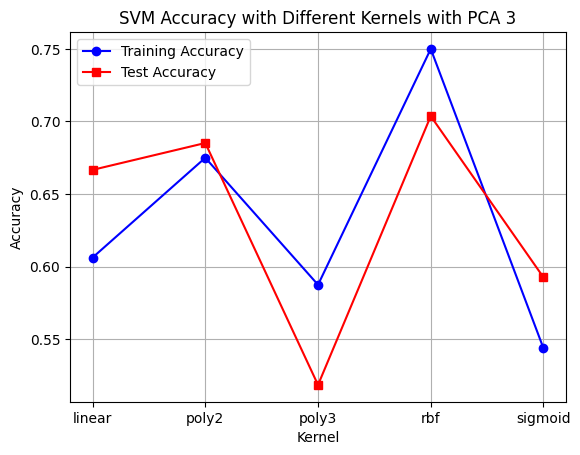

In [136]:
compressed = PCA(n_components=3).fit_transform(scaled_inputs)
x_train,x_test,t_train,t_test = train_test_split(compressed,targets, random_state= 42)
kernel_range = ["linear", "poly2", "poly3","rbf", "sigmoid"]
training_scores = []
test_scores = []
for k in kernel_range:
    if k == 'poly2':
        svm_classifier = SVC(kernel="poly", degree= 2, gamma='auto').fit(x_train,t_train)
    elif k == 'poly3':
        svm_classifier = SVC(kernel="poly", degree= 3, gamma='auto').fit(x_train,t_train) 
    else:
        svm_classifier = SVC(kernel=k, gamma='auto').fit(x_train,t_train) 
    y_train = svm_classifier.predict(x_train)
    y_test = svm_classifier.predict(x_test) 
    training_scores.append(accuracy_score(t_train,y_train))
    test_scores.append(accuracy_score(t_test,y_test))

plt.figure()
plt.title("SVM Accuracy with Different Kernels with PCA 3")
plt.xlabel("Kernel")
plt.ylabel("Accuracy")
plt.plot(kernel_range, training_scores, marker='o', label='Training Accuracy', color='blue')
plt.plot(kernel_range, test_scores, marker='s', label='Test Accuracy', color='red')
plt.xticks(kernel_range)  
plt.legend()
plt.grid(True)
plt.savefig("svm_kernel_pca_3.png", bbox_inches="tight")
plt.show()

#### PCA 4

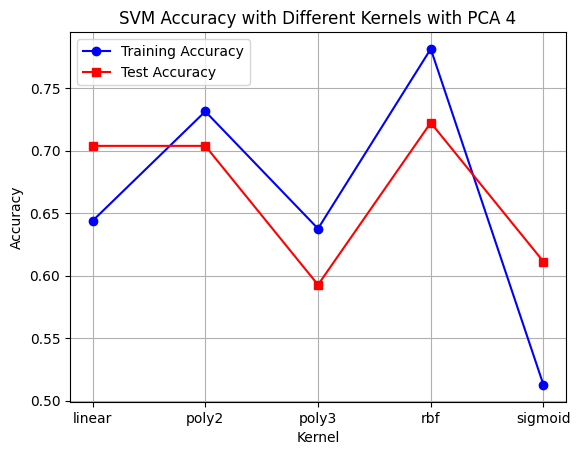

In [137]:
compressed = PCA(n_components=4).fit_transform(scaled_inputs)
x_train,x_test,t_train,t_test = train_test_split(compressed,targets, random_state= 42)
kernel_range = ["linear", "poly2", "poly3","rbf", "sigmoid"]
training_scores = []
test_scores = []
for k in kernel_range:
    if k == 'poly2':
        svm_classifier = SVC(kernel="poly", degree= 2, gamma='auto').fit(x_train,t_train)
    elif k == 'poly3':
        svm_classifier = SVC(kernel="poly", degree= 3, gamma='auto').fit(x_train,t_train) 
    else:
        svm_classifier = SVC(kernel=k, gamma='auto').fit(x_train,t_train) 
    y_train = svm_classifier.predict(x_train)
    y_test = svm_classifier.predict(x_test) 
    training_scores.append(accuracy_score(t_train,y_train))
    test_scores.append(accuracy_score(t_test,y_test))

plt.figure()
plt.title("SVM Accuracy with Different Kernels with PCA 4")
plt.xlabel("Kernel")
plt.ylabel("Accuracy")
plt.plot(kernel_range, training_scores, marker='o', label='Training Accuracy', color='blue')
plt.plot(kernel_range, test_scores, marker='s', label='Test Accuracy', color='red')
plt.xticks(kernel_range)  
plt.legend()
plt.grid(True)
plt.savefig("svm_kernel_pca_4.png", bbox_inches="tight")
plt.show()

#### PCA 5

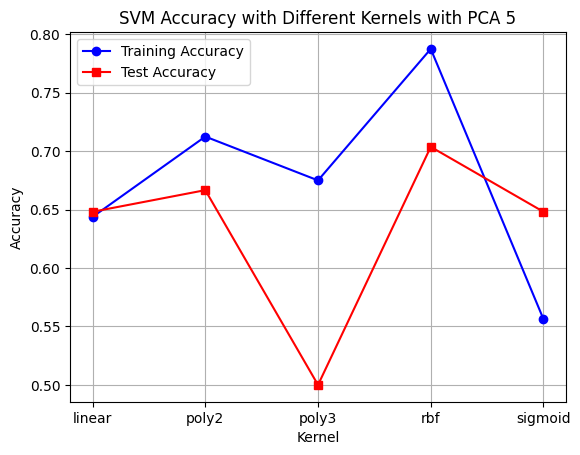

In [138]:
compressed = PCA(n_components=5).fit_transform(scaled_inputs)
x_train,x_test,t_train,t_test = train_test_split(compressed,targets, random_state= 42)
kernel_range = ["linear", "poly2", "poly3","rbf", "sigmoid"]
training_scores = []
test_scores = []
for k in kernel_range:
    if k == 'poly2':
        svm_classifier = SVC(kernel="poly", degree= 2, gamma='auto').fit(x_train,t_train)
    elif k == 'poly3':
        svm_classifier = SVC(kernel="poly", degree= 3, gamma='auto').fit(x_train,t_train) 
    else:
        svm_classifier = SVC(kernel=k, gamma='auto').fit(x_train,t_train) 
    y_train = svm_classifier.predict(x_train)
    y_test = svm_classifier.predict(x_test) 
    training_scores.append(accuracy_score(t_train,y_train))
    test_scores.append(accuracy_score(t_test,y_test))

plt.figure()
plt.title("SVM Accuracy with Different Kernels with PCA 5")
plt.xlabel("Kernel")
plt.ylabel("Accuracy")
plt.plot(kernel_range, training_scores, marker='o', label='Training Accuracy', color='blue')
plt.plot(kernel_range, test_scores, marker='s', label='Test Accuracy', color='red')
plt.xticks(kernel_range)  
plt.legend()
plt.grid(True)
plt.savefig("svm_kernel_pca_5.png", bbox_inches="tight")
plt.show()

#### PCA 6

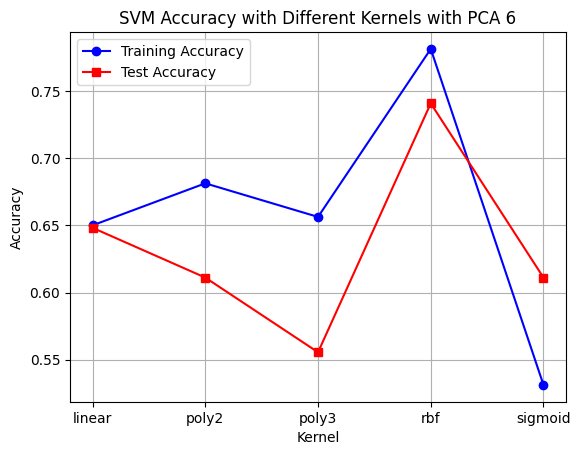

In [140]:
compressed = PCA(n_components=6).fit_transform(scaled_inputs)
x_train,x_test,t_train,t_test = train_test_split(compressed,targets, random_state= 42)
kernel_range = ["linear", "poly2", "poly3","rbf", "sigmoid"]
training_scores = []
test_scores = []
for k in kernel_range:
    if k == 'poly2':
        svm_classifier = SVC(kernel="poly", degree= 2, gamma='auto').fit(x_train,t_train)
    elif k == 'poly3':
        svm_classifier = SVC(kernel="poly", degree= 3, gamma='auto').fit(x_train,t_train) 
    else:
        svm_classifier = SVC(kernel=k, gamma='auto').fit(x_train,t_train) 
    y_train = svm_classifier.predict(x_train)
    y_test = svm_classifier.predict(x_test) 
    training_scores.append(accuracy_score(t_train,y_train))
    test_scores.append(accuracy_score(t_test,y_test))

plt.figure()
plt.title("SVM Accuracy with Different Kernels with PCA 6")
plt.xlabel("Kernel")
plt.ylabel("Accuracy")
plt.plot(kernel_range, training_scores, marker='o', label='Training Accuracy', color='blue')
plt.plot(kernel_range, test_scores, marker='s', label='Test Accuracy', color='red')
plt.xticks(kernel_range)  
plt.legend()
plt.grid(True)
plt.savefig("svm_kernel_pca_6.png", bbox_inches="tight")
plt.show()

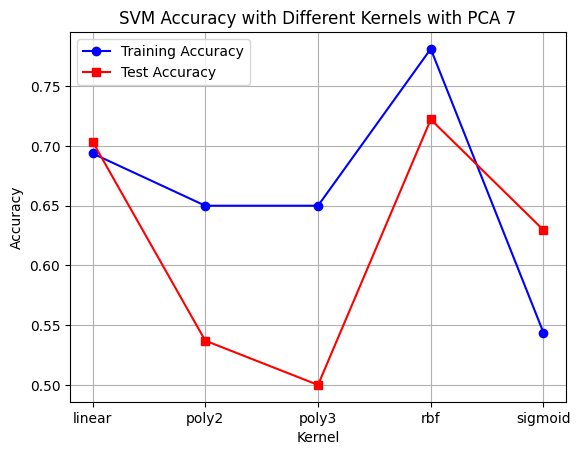

In [141]:
compressed = PCA(n_components=7).fit_transform(scaled_inputs)
x_train,x_test,t_train,t_test = train_test_split(compressed,targets, random_state= 42)
kernel_range = ["linear", "poly2", "poly3","rbf", "sigmoid"]
training_scores = []
test_scores = []
for k in kernel_range:
    if k == 'poly2':
        svm_classifier = SVC(kernel="poly", degree= 2, gamma='auto').fit(x_train,t_train)
    elif k == 'poly3':
        svm_classifier = SVC(kernel="poly", degree= 3, gamma='auto').fit(x_train,t_train) 
    else:
        svm_classifier = SVC(kernel=k, gamma='auto').fit(x_train,t_train) 
    y_train = svm_classifier.predict(x_train)
    y_test = svm_classifier.predict(x_test) 
    training_scores.append(accuracy_score(t_train,y_train))
    test_scores.append(accuracy_score(t_test,y_test))

plt.figure()
plt.title("SVM Accuracy with Different Kernels with PCA 7")
plt.xlabel("Kernel")
plt.ylabel("Accuracy")
plt.plot(kernel_range, training_scores, marker='o', label='Training Accuracy', color='blue')
plt.plot(kernel_range, test_scores, marker='s', label='Test Accuracy', color='red')
plt.xticks(kernel_range)  
plt.legend()
plt.grid(True)
plt.savefig("svm_kernel_pca_7.png", bbox_inches="tight")
plt.show()

#### Conclusion: 
PCA 5  and 4 achieves highest accuracy with RBF but potentially overfitting, with the primarily diffence being that PCA 4 is more suitable when using all kernels, whereas PCA 5 only really benefits RBF.

Moreover, PCA 6 offers the best generalisation with RBF kernel with the lowest variance between training and testing accuracy.

PCA 3 and lower offers too low of an accuracy to be worth any consideration.

A PCA higher than 6 offers little accuracy increases for the increased complexity, making it not worthwhile to investigate.

It is worth noting that there is no reguarlisation or gamma values cross validation implemented at this stage.

PCA 4 is best for KNN model, with 1 neighbour.


In [ ]:
compressed = PCA(n_components=5).fit_transform(scaled_inputs)

### Cross Validation for Linear

In [85]:
c_range = [0.1, 0.25, 0.5, 0.75, 1, 1.25, 1.5,1.75, 2, 2.5,3]
train_scores = []
test_scores =  []
for c in (c_range):
    svm_classifier = SVC(kernel="linear", C=c).fit(x_train, t_train) 
    y_train = svm_classifier.predict(x_train)
    y_test = svm_classifier.predict(x_test)
    
    train_scores.append(accuracy_score(t_train, y_train))
    test_scores.append(accuracy_score(t_test, y_test))


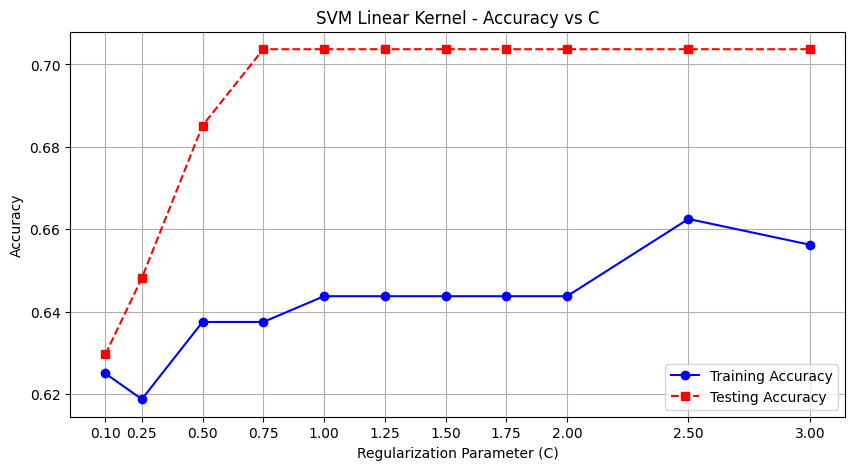

In [86]:
plt.figure(figsize=(10, 5))
plt.title("SVM Linear Kernel - Accuracy vs C")
plt.plot(c_range, train_scores, marker='o', label="Training Accuracy", linestyle='-', color='blue')
plt.plot(c_range, test_scores, marker='s', label="Testing Accuracy", linestyle='--', color='red')
plt.xticks(c_range) 
plt.xlabel("Regularization Parameter (C)")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.savefig("Linear_cross_validation.png", bbox_inches="tight")
plt.show()

### Cross Validation for RDF

In [90]:
gamma_range = np.linspace(0.1, 4.0, 40)
c_range = [0.1, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 2,2.25,2.5,2.75,3]

train_scores = np.zeros((len(gamma_range), len(c_range)))
test_scores = np.zeros((len(gamma_range), len(c_range)))

for x, g in enumerate(gamma_range):
    for y, c in enumerate(c_range):
        svm_classifier = SVC(kernel="rbf", gamma=g, C=c).fit(x_train, t_train)
        y_train = svm_classifier.predict(x_train)
        y_test = svm_classifier.predict(x_test)
        
        train_scores[x, y] = accuracy_score(t_train, y_train)
        test_scores[x, y] = accuracy_score(t_test, y_test)

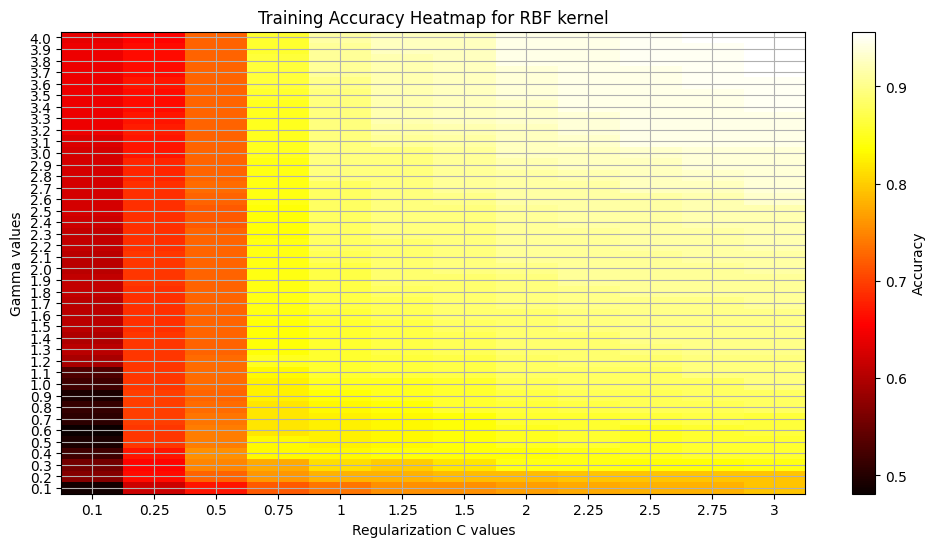

In [91]:
# Training accuracy heatmap for RBF kernel
plt.figure(figsize=(12, 6))
plt.title("Training Accuracy Heatmap for RBF kernel")
plt.subplot(1, 1, 1)
plt.imshow(train_scores, interpolation='nearest', cmap=plt.cm.hot, aspect='auto', origin='lower')
plt.colorbar(label='Accuracy')
plt.xlabel('Regularization C values')
plt.ylabel('Gamma values')
plt.xticks(np.arange(len(c_range)), c_range)
plt.yticks(np.arange(len(gamma_range)), np.round(gamma_range, 2))
plt.grid(True)
plt.savefig("RBF_training_accuracy_heatmap.png", bbox_inches="tight")
plt.show()

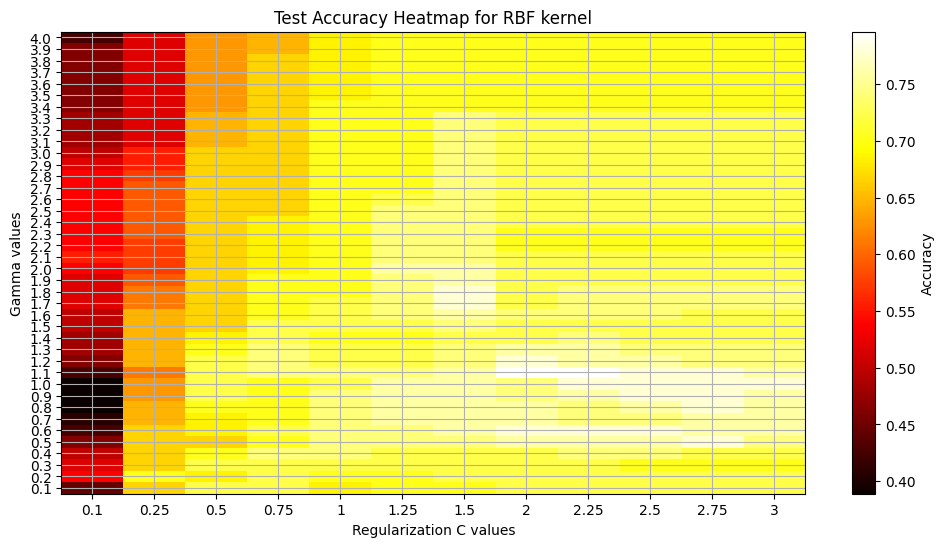

In [92]:
# Test accuracy heatmap for RFD kernel
plt.figure(figsize=(12, 6))
plt.title("Test Accuracy Heatmap for RBF kernel")
plt.imshow(test_scores, interpolation='nearest', cmap=plt.cm.hot, aspect='auto', origin='lower')
plt.colorbar(label='Accuracy')
plt.xlabel('Regularization C values')
plt.ylabel('Gamma values')
plt.xticks(np.arange(len(c_range)), c_range)
plt.yticks(np.arange(len(gamma_range)), np.round(gamma_range,2))
plt.grid(True)
plt.savefig("RBF_test_accuracy_heatmap.png", bbox_inches="tight")
plt.show()

### Cross Validation for Polynominal

In [94]:
gamma_range = np.linspace(0.1, 3.0, 30)
c_range = np.linspace(0.1, 3.0, 30)
coef0_range = np.linspace(0.5, 3.0, 6)

train_scores_poly_2 = np.zeros((len(gamma_range), len(c_range), len(coef0_range)))
test_scores_poly_2 = np.zeros((len(gamma_range), len(c_range), len(coef0_range)))

for x, g in enumerate(gamma_range):  
    for y, c in enumerate(c_range): 
        for z, cf in enumerate(coef0_range):  
            svm_classifier = SVC(kernel="poly", degree=2, gamma=g, C=c, coef0=cf).fit(x_train, t_train)
            y_train = svm_classifier.predict(x_train)
            y_test = svm_classifier.predict(x_test)

            train_scores_poly_2[x, y, z] = accuracy_score(t_train, y_train)
            test_scores_poly_2[x, y, z] = accuracy_score(t_test, y_test)


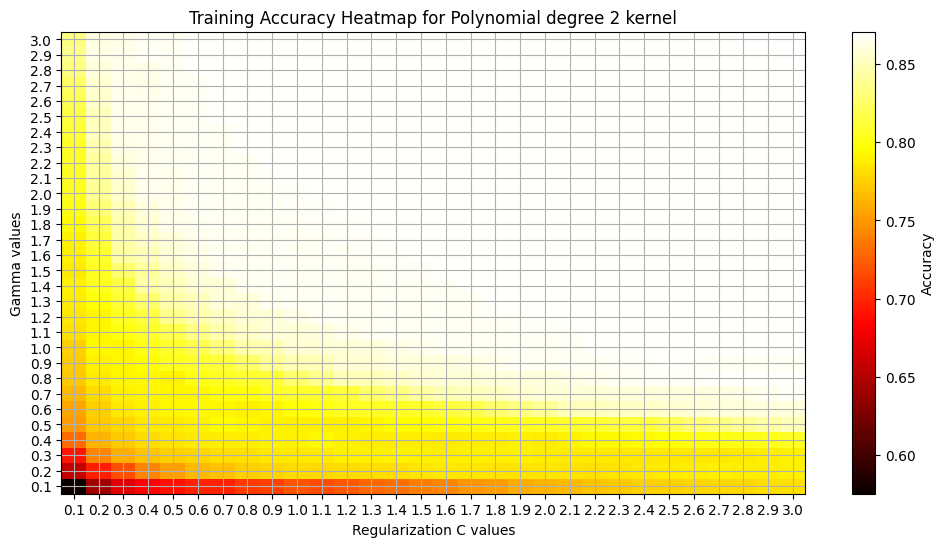

In [95]:
# Training accuracy heatmap for Polynomial degree 2 kernel using average of ceof0 value
plt.figure(figsize=(12, 6))
plt.title("Training Accuracy Heatmap for Polynomial degree 2 kernel")
plt.imshow(train_scores_poly_2.mean(axis=2), interpolation='nearest', cmap=plt.cm.hot, aspect='auto', origin='lower')
plt.colorbar(label='Accuracy')
plt.xlabel('Regularization C values')
plt.ylabel('Gamma values')
plt.xticks(np.arange(len(c_range)), np.round(c_range, 2))
plt.yticks(np.arange(len(gamma_range)), np.round(gamma_range, 2))
plt.grid(True)
plt.savefig("poly2_training_accuracy_heatmap.png", bbox_inches="tight")
plt.show()

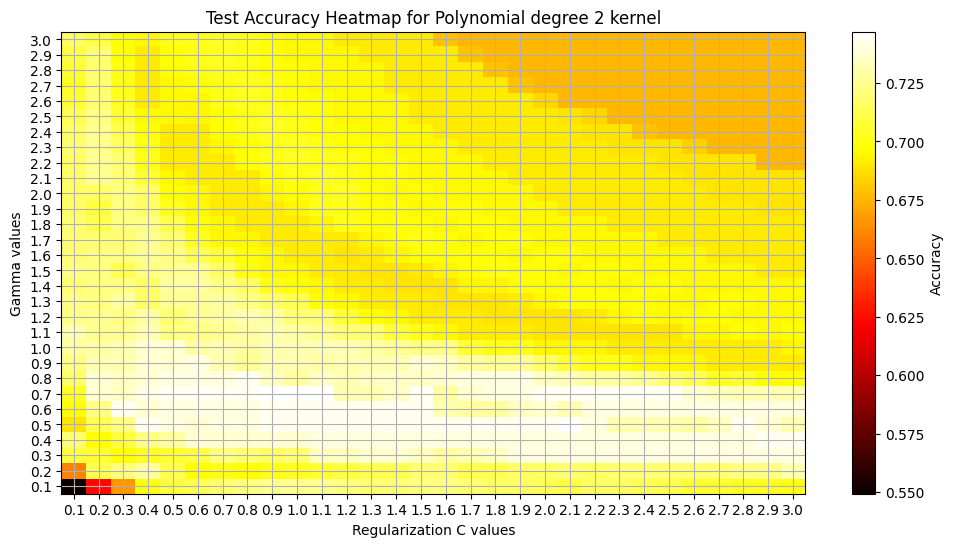

In [96]:
# Test accuracy heatmap for Polynomial degree 2 kernel using average of ceof0 value
plt.figure(figsize=(12, 6))
plt.title("Test Accuracy Heatmap for Polynomial degree 2 kernel")
plt.imshow(test_scores_poly_2.mean(axis=2), interpolation='nearest', cmap=plt.cm.hot, aspect='auto', origin='lower')
plt.colorbar(label='Accuracy')
plt.xlabel('Regularization C values')
plt.ylabel('Gamma values')
plt.xticks(np.arange(len(c_range)), np.round(c_range, 2))
plt.yticks(np.arange(len(gamma_range)), np.round(gamma_range, 2))
plt.grid(True)
plt.savefig("poly2_test_accuracy_heatmap.png", bbox_inches="tight")
plt.show()

In [97]:
gamma_range = np.linspace(0.1, 3.0, 30)
c_range = np.linspace(0.1, 3.0, 30)
coef0_range = np.linspace(0.5, 3.0, 6)
train_scores_poly_3 = np.zeros((len(gamma_range), len(c_range), len(coef0_range)))
test_scores_poly_3 = np.zeros((len(gamma_range), len(c_range), len(coef0_range)))

for x, g in enumerate(gamma_range):  
    for y, c in enumerate(c_range): 
        for z, cf in enumerate(coef0_range):  
            svm_classifier = SVC(kernel="poly", degree=3, gamma=g, C=c, coef0=cf).fit(x_train, t_train)
            y_train = svm_classifier.predict(x_train)
            y_test = svm_classifier.predict(x_test)

            train_scores_poly_3[x, y, z] = accuracy_score(t_train, y_train)
            test_scores_poly_3[x, y, z] = accuracy_score(t_test, y_test)

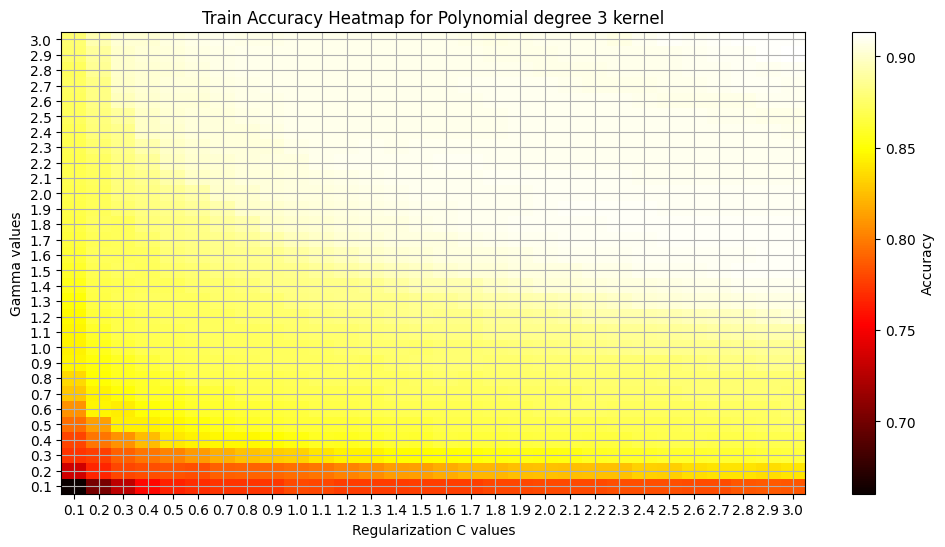

In [ ]:
# Train accuracy heatmap for Polynomial degree 2 kernel using average of ceof0 value
plt.figure(figsize=(12, 6))
plt.title("Train Accuracy Heatmap for Polynomial degree 3 kernel")
plt.imshow(train_scores_poly_3.mean(axis=2), interpolation='nearest', cmap=plt.cm.hot, aspect='auto', origin='lower')
plt.colorbar(label='Accuracy')
plt.xlabel('Regularization C values')
plt.ylabel('Gamma values')
plt.xticks(np.arange(len(c_range)), np.round(c_range, 2))
plt.yticks(np.arange(len(gamma_range)), np.round(gamma_range, 2))
plt.grid(True)
plt.savefig("poly3_train_accuracy_heatmap.png", bbox_inches="tight")
plt.show()

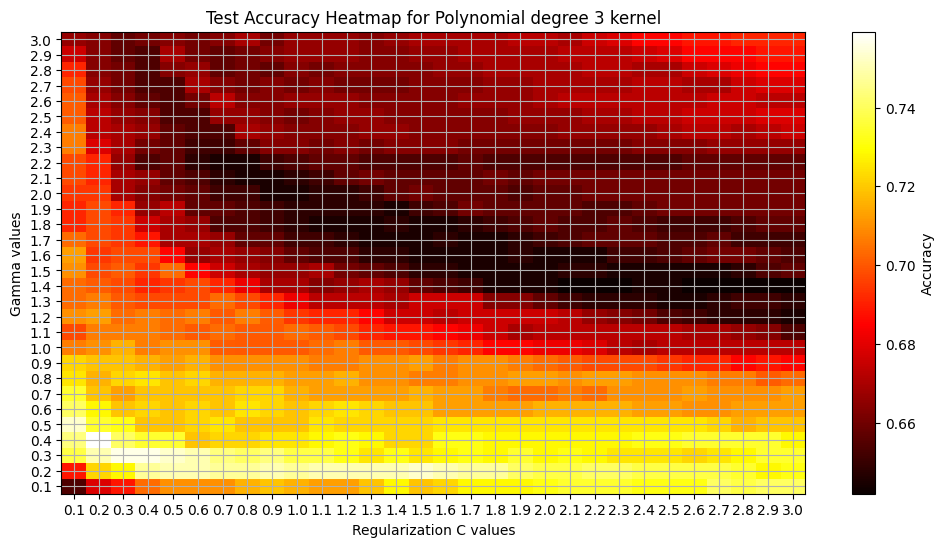

In [ ]:
# Test accuracy heatmap for Polynomial degree 3 kernel using average of ceof0 value
plt.figure(figsize=(12, 6))
plt.title("Test Accuracy Heatmap for Polynomial degree 3 kernel")
plt.imshow(test_scores_poly_3.mean(axis=2), interpolation='nearest', cmap=plt.cm.hot, aspect='auto', origin='lower')
plt.colorbar(label='Accuracy')
plt.xlabel('Regularization C values')
plt.ylabel('Gamma values')
plt.xticks(np.arange(len(c_range)), np.round(c_range, 2))
plt.yticks(np.arange(len(gamma_range)), np.round(gamma_range, 2))
plt.grid(True)
plt.savefig("poly3_test_accuracy_heatmap.png", bbox_inches="tight")
plt.show()

### Gridsearch

In [148]:
parameters = { 
    'C': [0.1,1,1.1,2,3,10, 100,500,150,1000],
    'gamma': ['scale', 'auto', 0.01,0.1,0.15,0.25,0.5,0.75,1,1.1,1.2,1.25,1.5,1.75,2,10]
}

svm_classifier = SVC(kernel="rbf")

grid_search = GridSearchCV(svm_classifier, parameters, cv=5, scoring='accuracy')

grid_search.fit(x_train, t_train)
print(f"Best Parameters: {grid_search.best_params_}")

best_model = grid_search.best_estimator_

y_test = best_model.predict(x_test)
y_test = best_model.predict(x_test)

train_accuracy= accuracy_score(t_train, y_train)
test_accuracy = accuracy_score(t_test, y_test)

print(f"RBF Parameters GridSearch Accuracy: {train_accuracy} training accuracy, {test_accuracy} testing accuracy")

Best Parameters: {'C': 100, 'gamma': 0.1}
RBF Parameters GridSearch Accuracy: 0.86875 training accuracy, 0.7407407407407407 testing accuracy


In [147]:
svm_classifier_grid = SVC(kernel="rbf",gamma=0.1,C=100).fit(x_train, t_train) 
# RBF : 0.86875 training accuracy, 0.7407407407407407 testing accuracy

y_train = svm_classifier_grid.predict(x_train)
y_test = svm_classifier_grid.predict(x_test)

train_accuracy = accuracy_score(t_train, y_train)
test_accuracy= accuracy_score(t_test, y_test)
print(f"RBF Parameters GridSearch Accuracy: {train_accuracy} training accuracy, {test_accuracy} testing accuracy")


RBF Parameters GridSearch Accuracy: 0.86875 training accuracy, 0.7407407407407407 testing accuracy


In [166]:
parameters = [
    {
        'kernel': ['poly'],'C': [0.1, 0.5, 1, 1.5, 2, 2.5, 3, 10, 100],'gamma': [0.1, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 'scale'],
        'degree': [2, 3],
        'coef0': [0.1, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5]
    },
    {
        'kernel': ['rbf'], 'C': [0.1, 0.5, 1, 1.5, 2, 2.5, 3, 10, 100],'gamma': [0.1, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 'scale']
    },
    {
        'kernel': ['linear'],'C': [0.1, 0.5, 1, 1.5, 2, 2.5, 3, 10, 100]
    }
]

grid = GridSearchCV(
    SVC(), # model
    parameters, #parameters to tune
    scoring='accuracy', #evaluation metric
    cv=5, #number of cross validation
    verbose=1, #  to print the progress
    n_jobs=-1  # how many cores to use in parallel
)

grid.fit(compressed, targets)
print(f"Best parameters: {grid.best_params_}")
print(f"Best cross-validation score: {grid.best_score_:.4f}")

best_model = grid.best_estimator_
# {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'} #found by grid search
# {'C': 0.5, 'coef0': 0.25, 'degree': 3, 'gamma': 2, 'kernel': 'poly'} #found by grid search
# svm_classifier_poly = SVC(kernel="poly", degree=2, gamma=2.5, C=0.9).fit(x_train, t_train) #more generalised found by me
# Best parameters: {'C': 10, 'coef0': 2, 'degree': 2, 'gamma': 0.75, 'kernel': 'poly'}
# Best parameters: {'C': 1, 'coef0': 1, 'degree': 3, 'gamma': 0.75, 'kernel': 'poly'}


Fitting 5 folds for each of 2907 candidates, totalling 14535 fits
Best parameters: {'C': 10, 'coef0': 2, 'degree': 2, 'gamma': 0.75, 'kernel': 'poly'}
Best cross-validation score: 0.7014


### Conclusion of SVM

#### Linear

In [81]:
compressed = PCA(n_components=4).fit_transform(scaled_inputs) 
x_train,x_test,t_train,t_test = train_test_split (compressed,targets, random_state= 42)
svm_classifier_manual = SVC(kernel="linear", C=0.75).fit(x_train, t_train) 

y_train_manual = svm_classifier_manual.predict(x_train)
y_test_manual = svm_classifier_manual.predict(x_test)

train_accuracy_manual = accuracy_score(t_train, y_train_manual)
test_accuracy_manual = accuracy_score(t_test, y_test_manual)
print(f"Linear kernel: {train_accuracy_manual} training accuracy, {test_accuracy_manual} testing accuracy")
#Linear kernel: 0.6625 training accuracy, 0.7037037037037037 testing accuracy


Linear kernel: 0.6375 training accuracy, 0.7037037037037037 testing accuracy


#### RBF

In [112]:
compressed = PCA(n_components=4).fit_transform(scaled_inputs) 
x_train,x_test,t_train,t_test = train_test_split (compressed,targets, random_state= 42)
svm_classifier_manual = SVC(kernel="rbf",gamma=1.1,C=2).fit(x_train, t_train) 

y_train_manual = svm_classifier_manual.predict(x_train)
y_test_manual = svm_classifier_manual.predict(x_test)

train_accuracy_manual = accuracy_score(t_train, y_train_manual)
test_accuracy_manual = accuracy_score(t_test, y_test_manual)
print(f"RBF kernel: {train_accuracy_manual} training accuracy, {test_accuracy_manual} testing accuracy")
#RBF kernel: 0.88125 training accuracy, 0.7962962962962963 testing accuracy



RBF kernel: 0.88125 training accuracy, 0.7962962962962963 testing accuracy


#### Polynominal

In [110]:
compressed = PCA(n_components=4).fit_transform(scaled_inputs) 
x_train,x_test,t_train,t_test = train_test_split (compressed,targets, random_state= 42)
svm_classifier_manual = SVC(kernel="poly",degree = 3,gamma=0.9285714285714285,C=0.30714285714285716,coef0=0.5142857142857142).fit(x_train, t_train) 

y_train_manual = svm_classifier_manual.predict(x_train)
y_test_manual = svm_classifier_manual.predict(x_test)

train_accuracy_manual = accuracy_score(t_train, y_train_manual)
test_accuracy_manual = accuracy_score(t_test, y_test_manual)
print(f"Polynominal kernal manual: {train_accuracy_manual} training accuracy, {test_accuracy_manual} testing accuracy")
#Polynominal kernal: 0.8375 training accuracy, 0.7777777777777778 testing accuracy


Polynominal kernal manual: 0.8375 training accuracy, 0.7777777777777778 testing accuracy


In [106]:
compressed = PCA(n_components=5).fit_transform(scaled_inputs) 
x_train,x_test,t_train,t_test = train_test_split (compressed,targets, random_state= 42)
svm_classifier_manual = SVC(kernel="poly",degree = 2,gamma=0.5,C=1.1,coef0=0.5142857142857142).fit(x_train, t_train) 

y_train_manual = svm_classifier_manual.predict(x_train)
y_test_manual = svm_classifier_manual.predict(x_test)

train_accuracy_manual = accuracy_score(t_train, y_train_manual)
test_accuracy_manual = accuracy_score(t_test, y_test_manual)
print(f"Polynominal kernal manual: {train_accuracy_manual} training accuracy, {test_accuracy_manual} testing accuracy")
#Polynominal kernal: 0.8375 training accuracy, 0.7777777777777778 testing accuracy


Polynominal kernal manual: 0.825 training accuracy, 0.7222222222222222 testing accuracy


## 1.3 Assessment of classification

After identifying the best model parameters in the previous task, the classification models you
have implemented must be assessed. To do this you are required to assess the accuracy for each
model. You may use the accuracy implementation available to do this. It is not sufficient to report a
single accuracy score. You must use cross-validation to report training results and report these
values using a plot. You will also need to write a summary analysing your results and findings. 

write summary analysis and findings here.
plot ployonimal results, the other two are already plotted

# 2.1 Generation of random solutions

You must use an evolutionary algorithm (EA). When evaluating an EA it is standard to compare
against randomness. Generate 500 random solutions to the problem and plot their fitness values.
You should plot the x and y values and colour the solutions according to their fitness value.